In [427]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.linalg import toeplitz # type: ignore

In [428]:
def quadraticMap(r,x):
    "Quadratic Map: f(x) = r(1/4 - x^2)"
    return r*(0.25 - x*x)

def logisticMap(r,x):
    "Logistic Map: f(x) = rx(1-x)"
    return r*x*(1-x)

# coupling matrix for 1D diffusion, 2 nearest neighbors
def couplingMat(eps,N):
    a = np.array([[1-eps],[eps/2]])
    b = np.zeros((1,N-3))
    c = np.array([[eps/2]])
    #row1 = np.array([[1-eps],[eps/2],[0],[0],[eps/2]])
    row1 = np.concatenate((a,b,c),axis=None)
    return toeplitz(row1)
    
def jacobQuad(r,ut,couplingMatrix):
     J = np.matmul(couplingMatrix,(-2*r*np.diagflat(ut)))
     return J

def gs(r,u,nnorm,jacobianFunc,couplingMatrix):
    '''
    Calculates Lyapunov exponents and Lyapunov vectors
    using the Gram-Schmidt reorthonormalization
    '''
    M, n = np.shape(u)
    v = np.zeros((n+1,M,M))
    v[0,:,:] = np.identity(M)
    R = np.zeros((n+1,M,M))
    laminst = np.zeros((M,n+1))
    lamgs = np.zeros((M,1))
    print('\nCalcualting GS..\n')
    for t in range(n):
        J = jacobianFunc(r,u[:,[t]],couplingMatrix)
        v[t+1,:,:], R[t,:,:] = np.linalg.qr(np.matmul(J,v[t,:,:]), mode='complete')
        for k in range(M):
                laminst[k,[t]] = np.log(np.abs(R[t,k,k]))
    for k in range(M):
        lamgs[k,0] = (1/(n))*np.sum(laminst[k,:])
    return v, R, laminst, lamgs

In [429]:
# parameters
N = 256 # system size
eps = 0.8 # diffusion strength
r = 2.8 # control parameter
time = 20000 # time steps

#initial conditions and lattice initialization
x = 0.5*np.random.rand(1,N)
x = x.reshape(N,1)
u = np.zeros((N,time))
u[:,[0]] = x

#coupling matrix
couplingMatrix = couplingMat(eps,N)

In [430]:
# lattice dynamics
for n in range(time-1):
        #u[:,[n]] = logisticMap(r,u[:,[n]])
        u[:,[n]] = quadraticMap(r,u[:,[n]])
        u[:,[n+1]] = np.matmul(couplingMatrix,u[:,[n]])

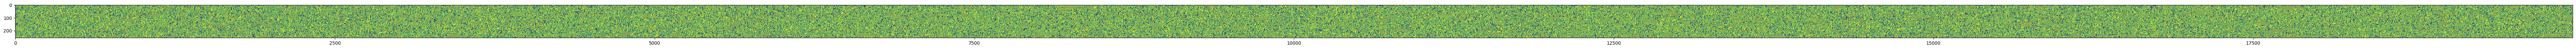

In [431]:
fig, ax = plt.subplots(1,1,figsize=(100,100))
ax.imshow(u,interpolation='nearest')
plt.show()

In [432]:
# Gram-Schmidt
v, R, laminst, lamgs = gs(r,u,1,jacobQuad,couplingMatrix)


Calcualting GS..



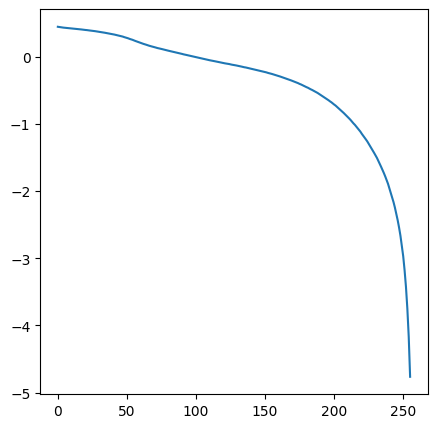

In [433]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(lamgs)
plt.show()